In [2]:
import os 
import joblib
import numpy as np
import pandas as pd
import shap

c:\Users\bhard\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Step 1: Load your dataset and model
dataset = pd.read_csv("final_features.csv")  # Update with your path
input_dataset = dataset.drop(['app_name', 'class'], axis=1)

In [8]:
model = joblib.load('saved_models/XGBoost.pkl')

In [10]:
# step 2 : use shap to compute 

explainer  = shap.Explainer(model , input_dataset)
shap_value = explainer(input_dataset)

100%|===================| 1037/1038 [00:27<00:00]       

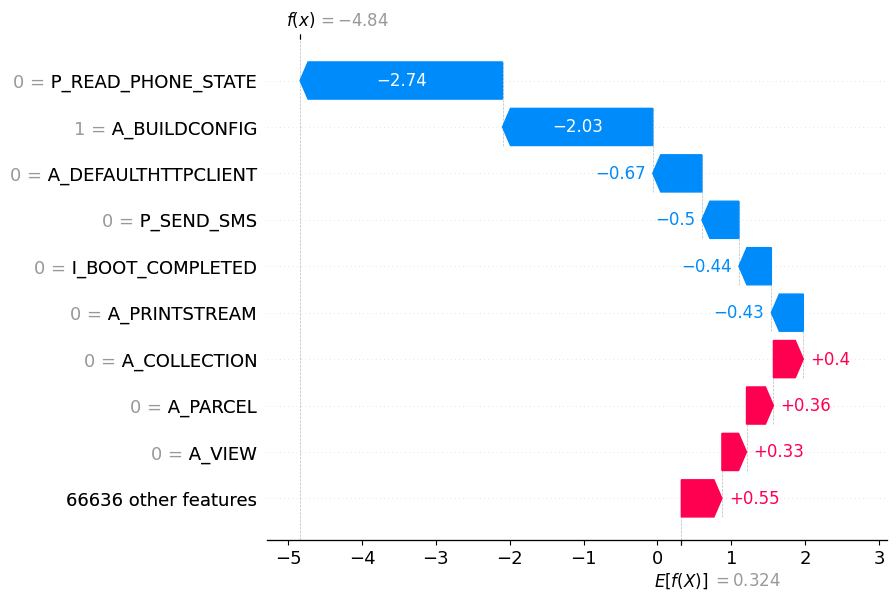

In [16]:
# For the first test sample, get SHAP values and plot waterfall
shap.plots.waterfall(shap_value[0])

In [ ]:
# Step 3: Compute mean absolute SHAP values
mean_shap = np.abs(shap_value.values).mean(axis=0)

In [13]:
# Step 4: Create a DataFrame with feature names and their importance
importance_df = pd.DataFrame({
    'Feature': input_dataset.columns,
    'Mean_SHAP_Value': mean_shap
})

In [ ]:
# Step 5: Sort by importance (descending)
importance_df = importance_df.sort_values(by='Value', ascending=False)

In [ ]:
# Step 6: Save to Excel
importance_df.to_excel("important_features.xlsx", index=False)